# **Importing Library**

In [4]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2                     
import os                  
from random import shuffle
from tqdm import tqdm  
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# **Importing Train Dataset**

In [42]:
import numpy as np

feats_train = np.load('/kaggle/input/5-calss-skin-cancer/feats_train.npy')
labels_train = np.load('/kaggle/input/5-calss-skin-cancer/labels_train.npy')


In [43]:
# Check shapes of the test features and labels
print(feats_train.shape)
print(labels_train.shape)

(15889, 224, 224, 3)
(15889,)


In [6]:
num_classes=len(np.unique(labels_train))
len_data=len(feats_train)
print(len_data)
print(num_classes)

15889
5


# **One Hot Encoding**

In [7]:
from tensorflow.keras.utils import to_categorical

# Assuming labels_train are integer-encoded
num_classes = 5  # Number of classes in your dataset
labels_train_one_hot = to_categorical(labels_train, num_classes=num_classes)


# **Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(feats_train, labels_train_one_hot, test_size=0.2, random_state=42)


# **Prepare the Data Generators**

In [9]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Shuffle and batch the datasets
batch_size = 32

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


# **Load the Pre-trained MobileNetV2 Model and Modify It**

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


# **Compile the Model**

In [12]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# **Train the Model**

In [13]:
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_val) // batch_size
)


Epoch 1/10
  7/397 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3004 - loss: 2.2576   

I0000 00:00:1715854236.144386     233 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


397/397 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.5859 - loss: 1.1250 - val_accuracy: 0.6591 - val_loss: 0.8342
Epoch 2/10
  1/397 ━━━━━━━━━━━━━━━━━━━━ 28:40 4s/step - accuracy: 1.0000 - loss: 0.5064

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


397/397 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 1.0000 - loss: 0.5064 - val_accuracy: 0.8000 - val_loss: 0.4705
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6813 - loss: 0.7956 - val_accuracy: 0.6749 - val_loss: 0.7956
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.5714 - loss: 1.5777 - val_accuracy: 0.8000 - val_loss: 0.4271
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7000 - loss: 0.7360 - val_accuracy: 0.6884 - val_loss: 0.7569
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.7143 - loss: 0.6723 - val_accuracy: 1.0000 - val_loss: 0.3910
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7134 - loss: 0.6977 - val_accuracy: 0.6992 - val_loss: 0.7413
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.5714 - loss: 0.8367 - val_accuracy: 1.0000 - val_loss: 0.3047
Epoch 9/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7229 - loss: 0.6755 - val_accuracy: 0

# **Fine-tune the Model**

In [14]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_val) // batch_size
)


Epoch 1/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.4254 - loss: 5.4235 - val_accuracy: 0.5461 - val_loss: 1.9784
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 1.0000 - loss: 0.4895 - val_accuracy: 0.7000 - val_loss: 1.8652
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6336 - loss: 0.9121 - val_accuracy: 0.5956 - val_loss: 1.3982
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.8571 - loss: 0.5775 - val_accuracy: 0.8000 - val_loss: 1.2784
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6749 - loss: 0.8093 - val_accuracy: 0.6364 - val_loss: 1.0649
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 0.8571 - loss: 0.3434 - val_accuracy: 0.8000 - val_loss: 0.8327
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6974 - loss: 0.7596 - val_accuracy: 0.6783 - val_loss: 0.8485
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.7143 - loss: 0.4149 - val_a

# Creating the folder to save the model

In [15]:
import os

# Define the name of the directory you want to create
new_directory_name = "skin_model"

# Define the path of the new directory within the Kaggle output directory
new_directory_path = "/kaggle/working/" + new_directory_name

# Create the new directory
os.makedirs(new_directory_path, exist_ok=True)

# Print a message indicating that the directory has been created
print("New directory created:", new_directory_path)


New directory created: /kaggle/working/skin_model


In [ ]:
# Save the model in HDF5 format.
model.save('/kaggle/working/skin_model/V2model.h5')


# **Downloading the Model**

In [83]:
!zip -r file.zip /kaggle/working/skin_model
!ls
from IPython.display import FileLink
FileLink(r'file.zip')

updating: kaggle/working/skin_model/ (stored 0%)
updating: kaggle/working/skin_model/V2model.h5 (deflated 11%)
file.zip  skin_model


/kaggle/working/file.zip

# **Importing Test Dataset**

In [59]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the test data
feats_test = np.load('/kaggle/input/test-class/feats_test.npy')
labels_test = np.load('/kaggle/input/test-lable/labels_test.npy')

# Load your model (assuming it has been previously saved)
loaded_model = tf.keras.models.load_model('/kaggle/working/skin_model/V2model.h5')


In [60]:
# Check shapes of the test features and labels
print(feats_test.shape)
print(labels_test.shape)


(1500, 224, 224, 3)
(1500,)


In [61]:
# Make predictions
predictions = loaded_model.predict(feats_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to integer labels
true_classes = labels_test  # Use the original integer labels


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step


# **Plotting confusion matrix**

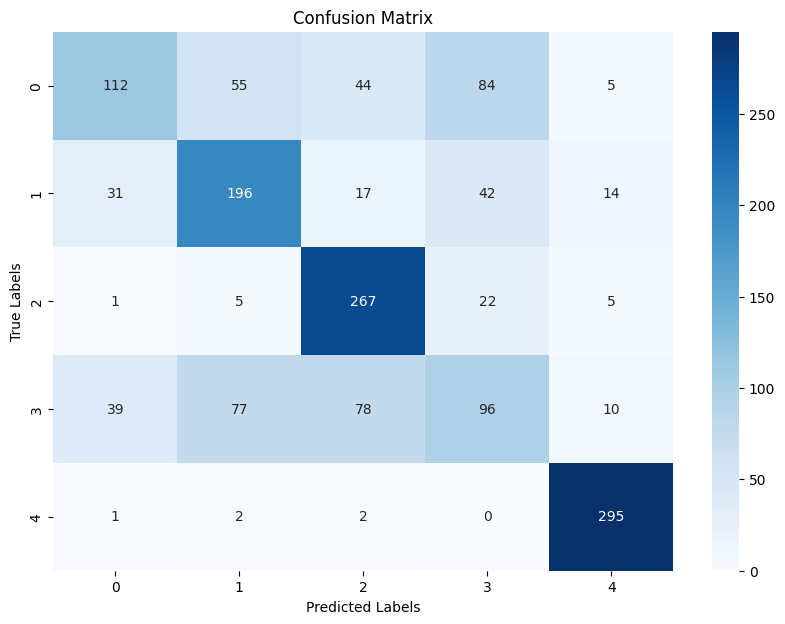

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# pip install tensorflow requests pillow


# **Predicting class name with probabilities for all classes**

In [2]:
import tensorflow as tf
# loaded_model = tf.keras.models.load_model('/kaggle/working/skin_model/V2model.h5')
loaded_model = tf.keras.models.load_model('/kaggle/input/gptskin5c/tensorflow2/gptskin5c/1/V2model.h5')


2024-05-16 12:37:55.209973: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 12:37:55.210090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 12:37:55.344296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#Function to Download and Preprocess Image
import requests
from PIL import Image
from io import BytesIO
import numpy as np

def download_and_preprocess_image(url, target_size=(224, 224)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    
    # Check if the image has an alpha channel (4th channel), and if so, remove it
    if img_array.shape[-1] == 4:  
        img_array = img_array[..., :3]  
    
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess the image
    return img_array


In [5]:
# Define Class Names
class_names = ['Basal_cell_carcinoma', 'Melanoma', 'Nevus', 'benign_keratosis', 'no_cancer']  # Update with your actual class names


In [6]:
#Function to Predict Class with Probabilities
def predict_image_class(url):
    img_array = download_and_preprocess_image(url)
    predictions = loaded_model.predict(img_array)
    
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    
    # Convert predictions to percentages
    prediction_percentages = predictions[0] * 100
    
    # Print out the prediction percentages for each class
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction_percentages[i]:.2f}%")
    
    return predicted_class_name, prediction_percentages



# **Usage**

In [11]:
# Example usage
image_url = input("Please enter the URL of the image: ")
predicted_class_name, prediction_percentages = predict_image_class(image_url)
print(f'Predicted class: {predicted_class_name}')

Please enter the URL of the image:  https://www.cancer.org/content/dam/cancer-org/images/galleries/skin-cancer-images/non-pre-cancer-normal-mole-01-restricted.jpg/jcr:content/renditions/cq5dam.web.1280.1280.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Basal_cell_carcinoma: 0.00%
Melanoma: 0.00%
Nevus: 0.00%
benign_keratosis: 0.00%
no_cancer: 100.00%
Predicted class: no_cancer
